https://towardsdatascience.com/historical-stock-price-data-in-python-a0b6dc826836
https://rapidapi.com/blog/best-stock-api/


In [2]:

import yfinance as yf
from IPython.display import display
from datetime import date as dt
import matplotlib.pyplot as plt


[*********************100%***********************]  1 of 1 completed


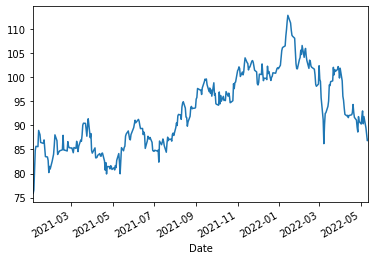

In [33]:

# Get the data for the stock AAPL
data = yf.download('emb','2021-01-01', dt.today().strftime('%Y-%m-%d'))
# Import the plotting library

%matplotlib inline
# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()

[*********************100%***********************]  5 of 5 completed
                   AGG       BNDX         EMB         MUB         VTI
Date                                                                 
2021-01-04  115.271614  56.291523  109.269302  114.345230  188.781448
2021-01-05  115.154427  56.233845  109.345131  114.442856  190.306503
2021-01-06  114.588028  56.156944  108.558334  114.325706  192.018478
2021-01-07  114.470840  56.166557  108.520424  114.325706  195.098083
2021-01-08  114.334152  56.128109  108.577309  114.130463  196.042648


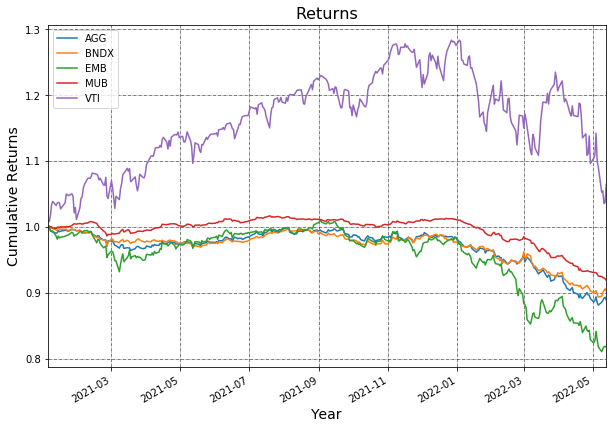

In [43]:

# Define the ticker list
import pandas as pd
tickers_list = ['VTI','AGG', 'BNDX', 'EMB', 'MUB']

# Fetch the data
import yfinance as yf
data = yf.download(tickers_list,'2021-01-01')['Adj Close']

# Print first 5 rows of the data
print(data.head())

# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [46]:
display((data.iloc[-1]-data.max())/data.max()*100)
data.tail()
#data.describe()

AGG    -11.070906
BNDX    -9.684447
EMB    -19.107392
MUB     -9.596593
VTI    -17.057036
dtype: float64

,AGG,BNDX,EMB,MUB,VTI
Date,,,,,
2022-05-09,102.070000,50.369999,88.559998,105.720001,198.649994
2022-05-10,102.379997,50.660000,89.000000,105.540001,199.050003
2022-05-11,102.760002,50.830002,89.389999,105.459999,195.449997
2022-05-12,102.949997,51.000000,89.449997,105.320000,195.660004
2022-05-13,102.510002,50.840000,89.300003,105.070000,200.899994


In [40]:

    """
    Through yfinance, you can also fetch the data of minute frequency. You can download for other frequency by just tweaking the interval parameter on line no 8 below. Following values are supported in the interval: 1m, 5m, 15m, 30m, 60m.
    """

# Get the data
data = yf.download(tickers="MSFT", period="5d", interval="1m")

# Print the data
print(data.tail())

[*********************100%***********************]  1 of 1 completed
                                 Open        High         Low       Close  \
Datetime                                                                    
2022-05-13 15:56:00-04:00  260.130005  260.434998  260.130005  260.355011   
2022-05-13 15:57:00-04:00  260.380005  260.670013  260.350006  260.609985   
2022-05-13 15:58:00-04:00  260.609985  260.739990  260.399994  260.674988   
2022-05-13 15:59:00-04:00  260.679993  261.190002  260.649994  261.119995   
2022-05-13 16:00:00-04:00  261.119995  261.119995  261.119995  261.119995   

                            Adj Close  Volume  
Datetime                                       
2022-05-13 15:56:00-04:00  260.355011  179940  
2022-05-13 15:57:00-04:00  260.609985  180182  
2022-05-13 15:58:00-04:00  260.674988  273331  
2022-05-13 15:59:00-04:00  261.119995  615792  
2022-05-13 16:00:00-04:00  261.119995       0  


In [41]:

#  get the tickers that make up your favourite index or are listed on a specific exchange
#get the tickers from the Wikipedia page and use those tickers to get data from yfinance.


# Read and print the stock tickers that make up S&P500
tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(tickers.head())

# Get the data for this tickers from yahoo finance
data = yf.download(tickers.Symbol.to_list(),'2021-1-1','2021-7-12', auto_adjust=True)['Close']
print(data.head())

  Symbol     Security SEC filings  GICS Sector         GICS Sub-Industry  \
0    MMM           3M     reports  Industrials  Industrial Conglomerates   
1    AOS  A. O. Smith     reports  Industrials         Building Products   
2    ABT       Abbott     reports  Health Care     Health Care Equipment   
3   ABBV       AbbVie     reports  Health Care           Pharmaceuticals   
4   ABMD      Abiomed     reports  Health Care     Health Care Equipment   

     Headquarters Location Date first added      CIK      Founded  
0    Saint Paul, Minnesota       1976-08-09    66740         1902  
1     Milwaukee, Wisconsin       2017-07-26    91142         1916  
2  North Chicago, Illinois       1964-03-31     1800         1888  
3  North Chicago, Illinois       2012-12-31  1551152  2013 (1888)  
4   Danvers, Massachusetts       2018-05-31   815094         1981  
[*********************100%***********************]  504 of 504 completed

3 Failed downloads:
- CEG: Data doesn't exist for startDate =